In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("books.csv")

data.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...


In [52]:

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

numeric_columns = data.select_dtypes(include=['number']).columns

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

Missing Values:
 book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                        44
authors                        0
original_publication_year      3
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64


In [53]:
#handeled numeric missing data

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 book_id                        0
goodreads_book_id              0
best_book_id                   0
work_id                        0
books_count                    0
isbn                          52
isbn13                         0
authors                        0
original_publication_year      0
original_title                52
title                          0
language_code                109
average_rating                 0
ratings_count                  0
work_ratings_count             0
work_text_reviews_count        0
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
image_url                      0
small_image_url                0
dtype: int64


In [54]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Impute missing values with mode for categorical columns only
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [55]:
# All missing values handeled succesfully

missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 book_id                      0
goodreads_book_id            0
best_book_id                 0
work_id                      0
books_count                  0
isbn                         0
isbn13                       0
authors                      0
original_publication_year    0
original_title               0
title                        0
language_code                0
average_rating               0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
image_url                    0
small_image_url              0
dtype: int64


In [56]:
# Convert numeric columns to numeric data types
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric)

# Convert categorical columns to categorical data types
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype('category')


In [57]:
# Check the data types of each column
print(data.dtypes)


book_id                         int64
goodreads_book_id               int64
best_book_id                    int64
work_id                         int64
books_count                     int64
isbn                         category
isbn13                        float64
authors                      category
original_publication_year     float64
original_title               category
title                        category
language_code                category
average_rating                float64
ratings_count                   int64
work_ratings_count              int64
work_text_reviews_count         int64
ratings_1                       int64
ratings_2                       int64
ratings_3                       int64
ratings_4                       int64
ratings_5                       int64
image_url                    category
small_image_url              category
dtype: object


In [58]:
# Check for duplicate rows
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicate_rows)

# Remove duplicate rows
data = data.drop_duplicates()

# Reset the index after dropping rows
data.reset_index(drop=True, inplace=True)

Number of duplicate rows: 0


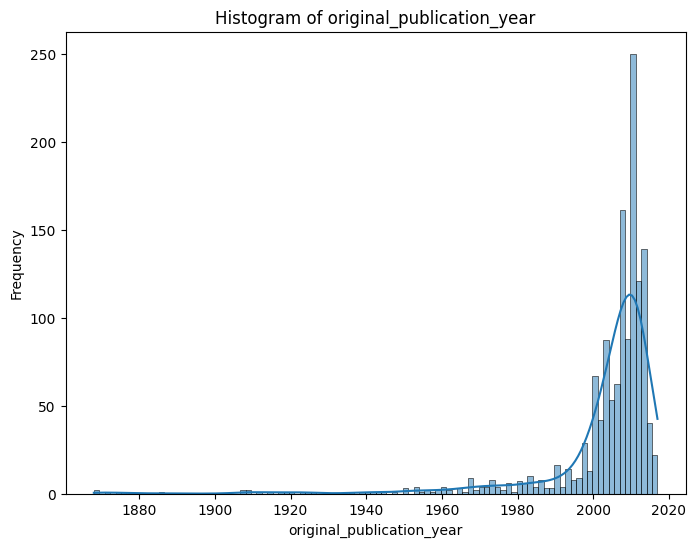

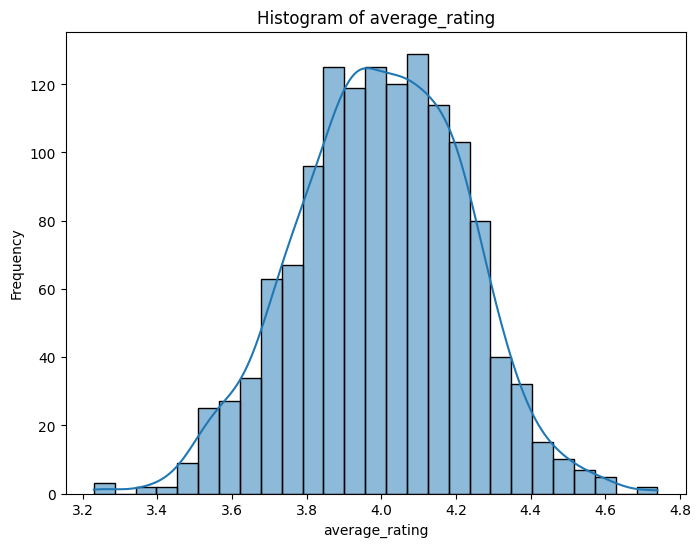

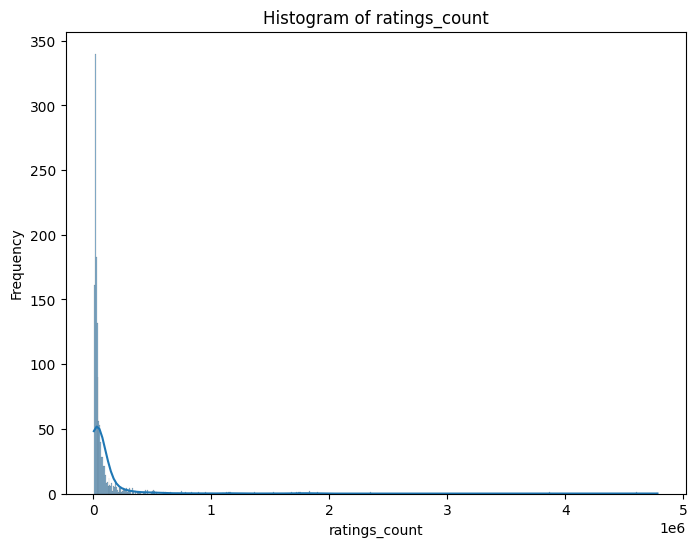

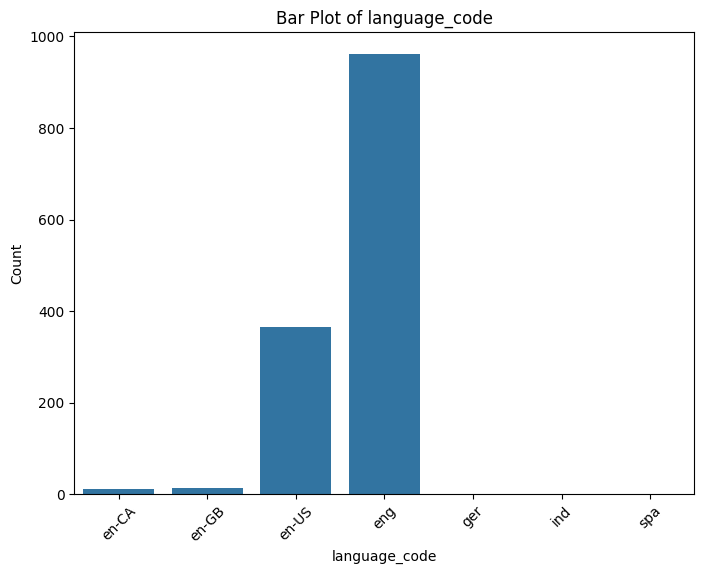

In [60]:
numerical_columns_subset = ['original_publication_year', 'average_rating', 'ratings_count']
categorical_columns_subset = ['language_code']

# Histograms for numerical variables
for column in numerical_columns_subset:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bar plots for categorical variables
for column in categorical_columns_subset:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Descriptive Statistics for Numerical Variables:
       original_publication_year  average_rating  ratings_count
count                1354.000000     1354.000000   1.354000e+03
mean                 2003.432792        3.999357   9.160429e+04
std                    16.762071        0.224263   2.871266e+05
min                  1868.000000        3.230000   6.221000e+03
25%                  2003.000000        3.850000   1.759325e+04
50%                  2008.000000        4.000000   2.943000e+04
75%                  2011.000000        4.160000   6.073800e+04
max                  2017.000000        4.740000   4.780653e+06

Correlation Matrix:
                           original_publication_year  average_rating  \
original_publication_year                   1.000000        0.018428   
average_rating                              0.018428        1.000000   
ratings_count                              -0.025194        0.133889   

                           ratings_count  
original_publication_ye

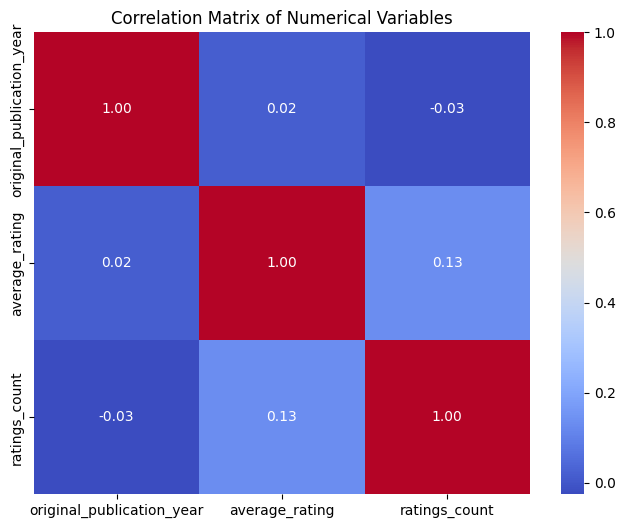

In [61]:
# Descriptive statistics for numerical variables
numerical_stats = data[numerical_columns_subset].describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

# Correlation analysis for numerical variables
correlation_matrix = data[numerical_columns_subset].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [62]:
harry_potter_books = data[data['title'].str.contains('Harry Potter', case=False)]

# Display information about Harry Potter books
print("Number of Harry Potter books:", len(harry_potter_books))
print("\nHarry Potter Books:")
print(harry_potter_books[['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count']])

# Descriptive statistics for Harry Potter books
harry_potter_stats = harry_potter_books.describe()
print("\nDescriptive Statistics for Harry Potter Books:")
print(harry_potter_stats)



Number of Harry Potter books: 11

Harry Potter Books:
                                                  title  \
1     Harry Potter and the Sorcerer's Stone (Harry P...   
6     Harry Potter and the Prisoner of Azkaban (Harr...   
8     Harry Potter and the Order of the Phoenix (Har...   
9     Harry Potter and the Chamber of Secrets (Harry...   
10    Harry Potter and the Goblet of Fire (Harry Pot...   
11    Harry Potter and the Deathly Hallows (Harry Po...   
12    Harry Potter and the Half-Blood Prince (Harry ...   
96             Harry Potter Boxset (Harry Potter, #1-7)   
613        Harry Potter Collection (Harry Potter, #1-6)   
1036  The Magical Worlds of Harry Potter: A Treasury...   
1266  Harry Potter Schoolbooks Box Set: Two Classic ...   

                                      authors  original_publication_year  \
1                 J.K. Rowling, Mary GrandPré                     1997.0   
6     J.K. Rowling, Mary GrandPré, Rufus Beck                     1999.0   
8        

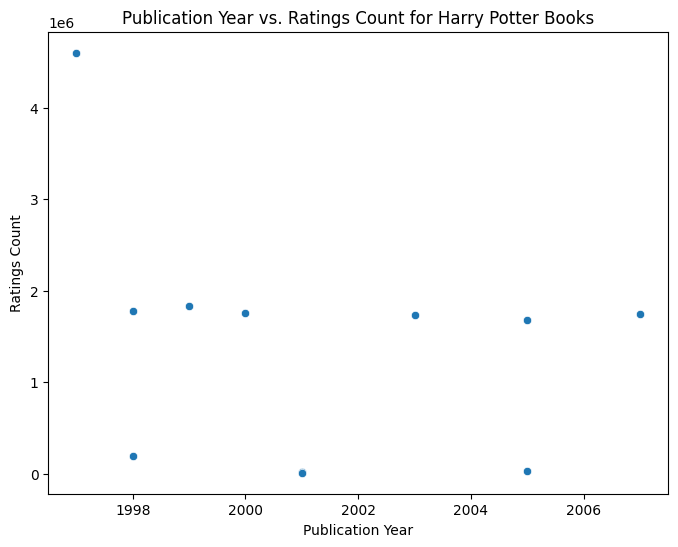

C:\Users\Kareem\AppData\Local\Temp\ipykernel_22524\1956255980.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=harry_potter_books, x='language_code', y='ratings_count', ci=None)


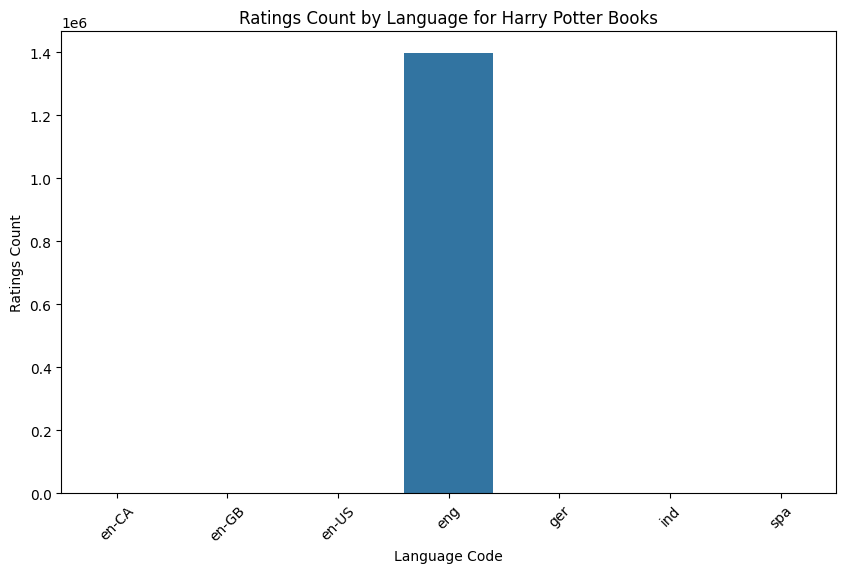

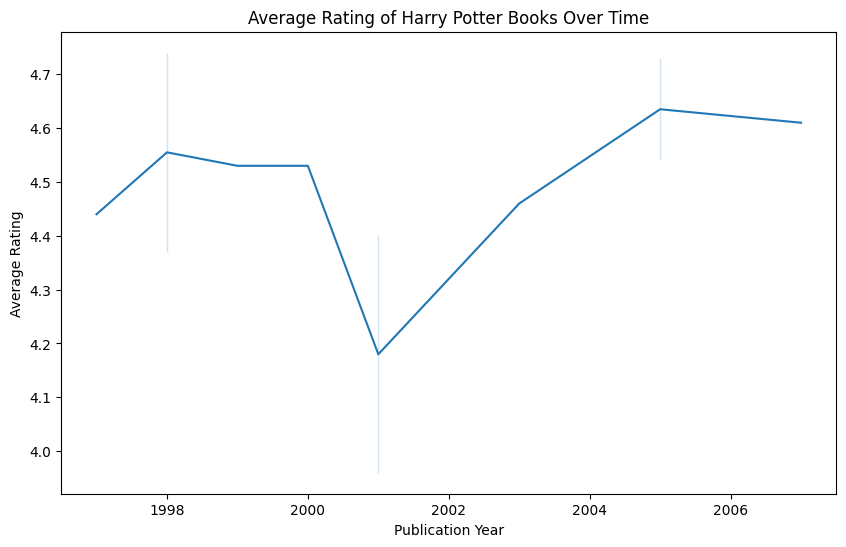

In [63]:
# Scatter plot of publication year vs. ratings count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=harry_potter_books, x='original_publication_year', y='ratings_count')
plt.title('Publication Year vs. Ratings Count for Harry Potter Books')
plt.xlabel('Publication Year')
plt.ylabel('Ratings Count')
plt.show()

# Bar plot of ratings count by language
plt.figure(figsize=(10, 6))
sns.barplot(data=harry_potter_books, x='language_code', y='ratings_count', ci=None)
plt.title('Ratings Count by Language for Harry Potter Books')
plt.xlabel('Language Code')
plt.ylabel('Ratings Count')
plt.xticks(rotation=45)
plt.show()

# Line plot of average rating over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=harry_potter_books, x='original_publication_year', y='average_rating')
plt.title('Average Rating of Harry Potter Books Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.show()
